## Part 0: Importing dependencies

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
tf.__version__

'2.6.2'

## Part 1: Data preprocessing

### Load the Cifar10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
#Setting class names for the output
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Image normalization

Just like with fashion_MNIST, each datapoint is divided by the number of pixels

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

There is no need to reshape the data this time, since it is fed to a CNN.

In [5]:
X_train.shape

(50000, 32, 32, 3)

Let's see an image

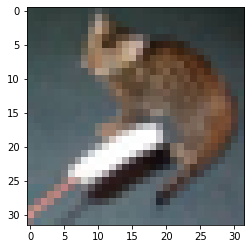

In [6]:
plt.imshow(X_test[106])

## Part 2: Build the Convolutional neural network
### Defining the model

Here, a convolutional neural network is used. It is still a Sequential model.
The model consists of two parts: a convolutional and a "simple" one.
The convolutional part uses convolutional and max pooling layers, and the simple part uses only dense layers.
To transition between the two parts, the tensors are flattened using a flattening layer.

In [7]:
model = tf.keras.models.Sequential()

### First Layer (Convolutional)

CNN layer hyper-parameters:
- filters: 32 the number of convolutions used
- kernel_size:3 the kernel size of each filter
- activation function: relu
- input_shape: (32, 32, 3) Images of 32 by 32 pixels of 3 channels


In [8]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[32, 32, 3]))

### The second convolutional layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation function: relu



In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

### The max pooling layer
MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2

In [10]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### The third layer

CNN layer hyper-parameters:

-    filters: 64
 -   kernel_size:3
  -  activation: relu

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))

###  The fourth CNN Layer and the second max pool layer

CNN layer hyper-parameters:

-    filters: 64
 -   kernel_size:3
  -  activation: relu

MaxPool layer hyper-parameters:

   - pool_size: 2
   - strides: 2

In [12]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### The Flatten layer

The flatten layer flattens its tensor input to a vector.

In [13]:
model.add(tf.keras.layers.Flatten())

### Add the first Dense layer

Once the convolutional part of the network is done, the data is flattened and fed to the dense part of the network.
Dense layer hyper-parameters:
- neurons: 128
- activation: relu

In [14]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer (Dense)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [15]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Show the model's architecture

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

### Compile the model

- Optimizer: Adam
- Loss function: Sparse softmax (categorical) crossentropy

Similar to the fashion MNIST model

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Part 3: Train the model

#### Again, only 5 epochs, since achieving accuracy is not the purpose of these exercises

In [18]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 176s 111ms/step - loss: 1.4010 - sparse_categorical_accuracy: 0.4934
Epoch 2/3
1563/1563 [==============================] - 190s 121ms/step - loss: 0.9524 - sparse_categorical_accuracy: 0.6657
Epoch 3/3
1563/1563 [==============================] - 189s 121ms/step - loss: 0.7758 - sparse_categorical_accuracy: 0.7282


### Evaluate the model on the test data

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 11s 34ms/step - loss: 0.7895 - sparse_categorical_accuracy: 0.7240
Test accuracy: 0.7239999771118164


## Part 4: Save the model

### Save the architecture of the network as .json

In [21]:
model_json = model.to_json()
with open("02_cifar10_model.json", "w") as json_file:
    json_file.write(model_json)

### Save the network weights

In [22]:
model.save_weights("02_cifar10_model.h5")